<h1>Text Classification using Ensemble Model<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ensemble-Learning" data-toc-modified-id="Ensemble-Learning-1">Ensemble Learning</a></span><ul class="toc-item"><li><span><a href="#Boosting" data-toc-modified-id="Boosting-1.1">Boosting</a></span></li><li><span><a href="#Bagging" data-toc-modified-id="Bagging-1.2">Bagging</a></span></li><li><span><a href="#Stacking" data-toc-modified-id="Stacking-1.3">Stacking</a></span></li></ul></li><li><span><a href="#Machine-Learning-Project-Lifecycle:-Fourth-Iteration" data-toc-modified-id="Machine-Learning-Project-Lifecycle:-Fourth-Iteration-2">Machine Learning Project Lifecycle: Fourth Iteration</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-2.1">Problem Statement</a></span></li><li><span><a href="#Training-Data" data-toc-modified-id="Training-Data-2.2">Training Data</a></span></li><li><span><a href="#Preprocessing-+-Feature-Engineering" data-toc-modified-id="Preprocessing-+-Feature-Engineering-2.3">Preprocessing + Feature Engineering</a></span></li><li><span><a href="#Machine-Learning-Algorithm:-Ensemble-Learning" data-toc-modified-id="Machine-Learning-Algorithm:-Ensemble-Learning-2.4">Machine Learning Algorithm: Ensemble Learning</a></span><ul class="toc-item"><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-2.4.1">Naive Bayes</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2.4.2">Logistic Regression</a></span></li><li><span><a href="#Ensemble-Model:-EnsembleVoteClassifier" data-toc-modified-id="Ensemble-Model:-EnsembleVoteClassifier-2.4.3">Ensemble Model: <a href="http://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/" target="_blank">EnsembleVoteClassifier</a></a></span></li><li><span><a href="#Ensemble-Model:-StackingClassifier" data-toc-modified-id="Ensemble-Model:-StackingClassifier-2.4.4">Ensemble Model: <a href="http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/" target="_blank">StackingClassifier</a></a></span></li></ul></li><li><span><a href="#Decision-Boundry" data-toc-modified-id="Decision-Boundry-2.5">Decision Boundry</a></span></li><li><span><a href="#Quality-Metrics" data-toc-modified-id="Quality-Metrics-2.6">Quality Metrics</a></span></li><li><span><a href="#Model-Evaluation-on-Test-Dataset" data-toc-modified-id="Model-Evaluation-on-Test-Dataset-2.7">Model Evaluation on Test Dataset</a></span></li></ul></li><li><span><a href="#Resources" data-toc-modified-id="Resources-3">Resources</a></span></li></ul></div>

<img src="../images/classification.png" alt="Classification" style="width: 700px;"/>

## Ensemble Learning

**Can we get an advice from multiple experts instead of trusting one person?**

Idea of Ensemble Learning traces back to similar ideas like [Condorcet's jury theorem](https://en.wikipedia.org/wiki/Condorcet%27s_jury_theorem) and [Wisdom of the crowd](https://en.wikipedia.org/wiki/Wisdom_of_the_crowd) where it has been proven that collective opinion of a group of individual is better than Single expert.

### Boosting

**Born out of [question](https://www.cis.upenn.edu/~mkearns/papers/boostnote.pdf): is it possible to get one strong model from a huge large amount of relatively week and simple models?**

[Robert Schapire](https://en.wikipedia.org/wiki/Robert_Schapire) gave the mathematical [solution](https://www.cs.princeton.edu/~schapire/papers/strengthofweak.pdf) to this question & after few years first implementation of Boosting as Adaboost was implemented.

**High Level Algo:**

- Start same weight for all points: $ {\displaystyle \alpha_i = 1 / N} $
- For t = 1, .. ,T
   - Learn $f_t(X)$ with data weigth $\alpha_i$
   - Compute Coeffieicent $\hat w_t$ using a **Base Learner**
   - Recompute weights $\alpha_i$
   - Normalize weights $\alpha_i$
- Final model predicts by:
    - $\hat y = sign \: \big(\displaystyle \sum_{t=1} ^ T \hat w_t . f_t(X) \big)$

<img src='../images/boosting_example.jpg' alt='Boosting Example' style="width: 500px;" align="left">

<img src='../images/boosting_example2.png' alt='Boosting Example2' style="width: 500px;" align="left">

### Bagging

Also known as Bootstrapping was proprosed by [Leo Breiman](https://en.wikipedia.org/wiki/Leo_Breiman) in 1994.

**High Level Algo:**

- Given Dataset $X$ of size $N$
- During Training, Repeat the process $M$ times
    - Randomly select $N_1$ elements from X where $N_1 < N$ with replacement
    - Create $M_i$ bootstrap sample
    - Train model using $M_i$ bootstrapped sample and a **Base Learner**
- During prediction, Make prediction using $M$ models
- Now either use a vooting(in case of discrete values) or average (in case of continous values) method to make the final prediction.

<img src='../images/bagging_example.png' alt='Bagging' style="width: 500px;" align="left">

### Stacking

Also known as Meta Learning uses different base learner & a meta classifier that uses the output of the base learners as its own input

<img src='../images/stacking_algorithm.png' alt='Stacking Algo' style="width: 700px;" align="left">

<img src='../images/stacking_example.png' alt='Stacking' style="width: 700px;" align="left">

## Machine Learning Project Lifecycle: Fourth Iteration

### Problem Statement

Classify the Financial Consumer Complaints into different Product Categories given consumer complaint text.

**Product Categories**

- Credit reporting, repair, or other
- Debt collection
- Student loan
- Money transfer, virtual currency, or money service
- Bank account or service

### Training Data

[Kaggle: Consumer Complaint Database](https://www.kaggle.com/selener/consumer-complaint-database)

In [1]:
import pandas as pd
import numpy as np

In [2]:
complaints_training_dataset = pd.read_csv('../datasets/consumer_complaints_training_dataset.csv')

In [3]:
complaints_training_dataset.head()

,Product,Complaint_text
0,"Credit reporting, repair, or other","My name is XXXX XXXX XXXX , not XXXX X..."
1,"Credit reporting, repair, or other",I was shocked when I reviewed my credit report...
2,"Credit reporting, repair, or other",Equifax misused of credit file. Disputing acco...
3,"Credit reporting, repair, or other",I am disturbed that you continue to list the v...
4,"Credit reporting, repair, or other",I went to multiple different credit report web...


In [4]:
complaints_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product         20000 non-null  object
 1   Complaint_text  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


**Q) What is the distribution of complaints for each product type?**

In [5]:
complaints_training_dataset.Product.unique()

array(['Credit reporting, repair, or other', 'Debt collection',
       'Student loan',
       'Money transfer, virtual currency, or money service',
       'Bank account or service'], dtype=object)

In [6]:
complaints_training_dataset\
    .groupby('Product')\
    [['Complaint_text']]\
    .count()\
    .rename(columns={'Complaint_text': 'Count'})\
    .sort_values('Count', ascending=False)

,Count
Product,
Bank account or service,4000
"Credit reporting, repair, or other",4000
Debt collection,4000
"Money transfer, virtual currency, or money service",4000
Student loan,4000


**Q) Find out the Occurances of Duplicate Text messages if any?**

In [7]:
complaints_training_dataset['Complaint_text'].nunique()

19913

In [8]:
duplicate_complaints = complaints_training_dataset['Complaint_text']\
    .value_counts()\
    [complaints_training_dataset['Complaint_text'].value_counts() > 2].index

In [9]:
len(duplicate_complaints)

9

### Preprocessing + Feature Engineering

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

RANDOM_STATE = 19

In [11]:
count_vectorizer = CountVectorizer(stop_words='english', max_features=5000)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    complaints_training_dataset['Complaint_text'],
    complaints_training_dataset['Product'],
    test_size=.2,
    stratify=complaints_training_dataset['Product'],
    random_state=RANDOM_STATE)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000,), (4000,), (16000,), (4000,))

In [14]:
X_train_count_vectorizer = count_vectorizer.fit_transform(X_train)
X_test_count_vectorizer = count_vectorizer.transform(X_test)

In [15]:
len(count_vectorizer.get_feature_names())

5000

In [16]:
count_vectorizer.get_feature_names()[:10]

['00', '000', '10', '100', '1000', '10000', '100000', '1005', '11', '110']

In [17]:
list(count_vectorizer.vocabulary_.items())[:10]

[('xxxx', 4976),
 ('account', 322),
 ('listed', 2727),
 ('credit', 1279),
 ('report', 3828),
 ('experian', 1842),
 ('paid', 3234),
 ('closed', 1021),
 ('2007', 63),
 ('like', 2712)]

In [18]:
X_train_count_vectorizer.shape, X_test_count_vectorizer.shape

((16000, 5000), (4000, 5000))

### Machine Learning Algorithm: Ensemble Learning

#### Naive Bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

naive_bayes = MultinomialNB()

nb_cv_score = cross_val_score(naive_bayes, X_train_count_vectorizer,
                                     y_train, cv=5)

naive_bayes.fit(X_train_count_vectorizer, y_train)

naive_bayes_predictions = naive_bayes.predict(X_test_count_vectorizer)

nb_test_score = accuracy_score(y_test, naive_bayes_predictions)

print(f'NB Cross val mean score is {nb_cv_score.mean()} and test score is {nb_test_score}')

NB Cross val mean score is 0.8623125 and test score is 0.859


#### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings(action='ignore')

lr = LogisticRegression(penalty='l2', max_iter=501, random_state=RANDOM_STATE)

lr_cv_scores = cross_val_score(lr, X_train_count_vectorizer,
                                     y_train, cv=5)

lr.fit(X_train_count_vectorizer, y_train)

lr_predictions = lr.predict(X_test_count_vectorizer)

lr_test_score = accuracy_score(y_test, lr_predictions)

print(f'LR Cross val mean score is {lr_cv_scores.mean()} and test score is {lr_test_score}')

LR Cross val mean score is 0.8402499999999999 and test score is 0.84075


#### Ensemble Model: [EnsembleVoteClassifier](http://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/)

In [21]:
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.classifier import StackingClassifier

**EnsembleVoteClassifier with Voting counts as final prediction**

In [22]:
lr_classifier = LogisticRegression(penalty='l2', random_state=RANDOM_STATE, max_iter=500)
nb_classifier = MultinomialNB()

ensemble_hard_vote_classifier = EnsembleVoteClassifier(
    clfs=[lr_classifier, nb_classifier],
    weights=[1, 1],
    voting='hard')

ensemble_hard_vote_classifier_cv_scores = cross_val_score(
    ensemble_hard_vote_classifier, X_train_count_vectorizer,
    y_train, cv=5, scoring='accuracy')

ensemble_hard_vote_classifier.fit(X_train_count_vectorizer, y_train)

ensemble_hard_vote_classifier_predictions = ensemble_hard_vote_classifier.predict(X_test_count_vectorizer)

ensemble_hard_vote_classifier_test_score = accuracy_score(y_test, ensemble_hard_vote_classifier_predictions)

print(f'Hard Vote Classifier Cross val mean score is {ensemble_hard_vote_classifier_cv_scores.mean()}',
      f'and test score is {ensemble_hard_vote_classifier_test_score}')

Hard Vote Classifier Cross val mean score is 0.8491875 and test score is 0.84325


**EnsembleVoteClassifier with Probability as final prediction**

In [23]:
lr_classifier = LogisticRegression(penalty='l2', random_state=RANDOM_STATE, max_iter=500)
nb_classifier = MultinomialNB()

ensemble_soft_vote_classifier = EnsembleVoteClassifier(
    clfs=[lr_classifier, nb_classifier],
    weights=[1, 1],
    voting='soft')

ensemble_soft_vote_classifier_cv_scores = cross_val_score(
    ensemble_soft_vote_classifier, X_train_count_vectorizer,
    y_train, cv=5, scoring='accuracy')

ensemble_soft_vote_classifier.fit(X_train_count_vectorizer, y_train)

ensemble_soft_vote_classifier_predictions = ensemble_soft_vote_classifier.predict(X_test_count_vectorizer)

ensemble_soft_vote_classifier_test_score = accuracy_score(y_test, ensemble_soft_vote_classifier_predictions)

print(f'Soft Vote Classifier Cross val mean score is {ensemble_soft_vote_classifier_cv_scores.mean()}',
      f'and test score is {ensemble_soft_vote_classifier_test_score}')

Soft Vote Classifier Cross val mean score is 0.8688125 and test score is 0.86725


#### Ensemble Model: [StackingClassifier](http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/)

In [44]:
clf1 = LogisticRegression(penalty='l2', random_state=RANDOM_STATE, max_iter=500)
clf2 = MultinomialNB()
meta_classifier = LogisticRegression(penalty='l2', random_state=RANDOM_STATE, max_iter=500)

stacked_classifier = StackingClassifier(
    classifiers=[clf1, clf2],
    meta_classifier=meta_classifier,
    use_probas=True, average_probas=True,
    store_train_meta_features=True, drop_last_proba=False)

stacked_classifier_cv_scores = cross_val_score(
    stacked_classifier, X_train_count_vectorizer, y_train, cv=5, scoring='accuracy')

stacked_classifier.fit(X_train_count_vectorizer, y_train)

stacked_classifier_predictions = stacked_classifier.predict(X_test_count_vectorizer)

stacked_classifier_test_score = accuracy_score(y_test, stacked_classifier_predictions)

print(f'Stacked Classifier Cross val mean score is {stacked_classifier_cv_scores.mean()}',
      f'and test score is {stacked_classifier_test_score}')

Stacked Classifier Cross val mean score is 0.8665 and test score is 0.869


In [45]:
stacked_classifier.train_meta_features_.shape

(16000, 5)

### Decision Boundry

In [56]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [77]:
label_to_index_mapping = dict(zip(y_train.unique(), range(0, 5)))
X = X_train_count_vectorizer.toarray()
y = np.array([label_to_index_mapping[label] for label in y_train.to_numpy()])

ValueError: Filler values must be provided when X has more than 2 training features.

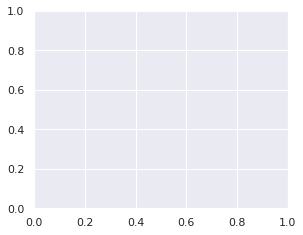

In [78]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([naive_bayes, lr_classifier, ensemble_soft_vote_classifier, stacked_classifier], 
                         ['Niave Bayes', 
                          'Logistic Regression', 
                          'Vote Classifier',
                          'StackingClassifier'],
                          itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)

### Quality Metrics

In [42]:
from sklearn.metrics import (accuracy_score,
                             confusion_matrix)

import seaborn as sns;
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
nb_conf_matrix = confusion_matrix(y_test, naive_bayes_predictions)
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)
ensemble_vote_clf_conf_matrix = confusion_matrix(y_test, ensemble_soft_vote_classifier_predictions)
stacked_clf_conf_matrix = confusion_matrix(y_test, stacked_classifier_predictions)

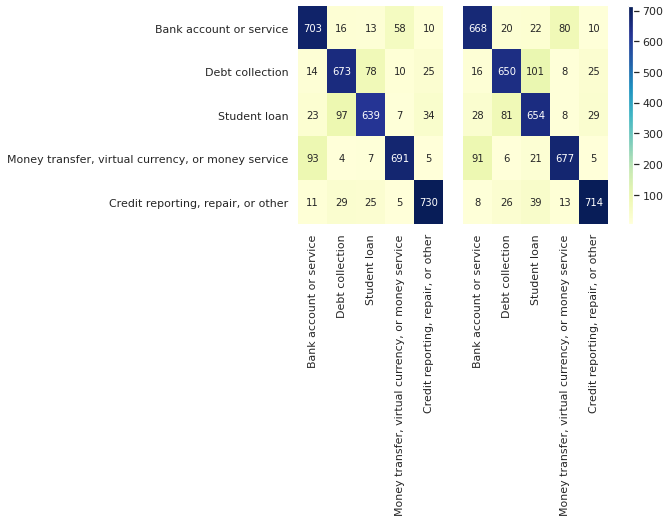

In [55]:
fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[6, 6, 0.2]), figsize=(6, 4))

sns.heatmap(nb_conf_matrix,
            cmap='YlGnBu',
            annot=True,
            fmt="d",
            cbar=False,
            xticklabels=y_test.unique(),
            yticklabels=y_test.unique(),
            ax=axs[0])
             
sns.heatmap(lr_conf_matrix,
            cmap='YlGnBu',
            annot=True,
            fmt="d",
            cbar=False,
            xticklabels=y_test.unique(),
            yticklabels=False,
            ax=axs[1])

fig.colorbar(axs[1].collections[0], cax=axs[2])
plt.show()

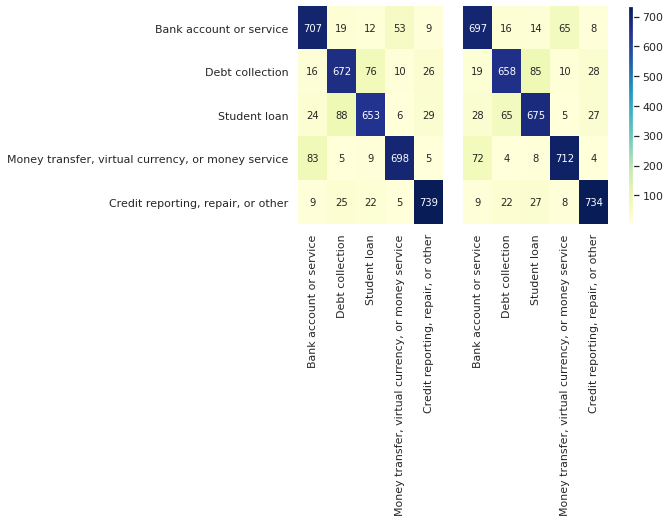

In [53]:
fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[6, 6, 0.2]), figsize=(6, 4))

sns.heatmap(ensemble_vote_clf_conf_matrix,
            cmap='YlGnBu',
            annot=True,
            fmt="d",
            cbar=False,
            xticklabels=y_test.unique(),
            yticklabels=y_test.unique(),
            ax=axs[0])
             
sns.heatmap(stacked_clf_conf_matrix,
            cmap='YlGnBu',
            annot=True,
            fmt="d",
            cbar=False,
            xticklabels=y_test.unique(),
            yticklabels=False,
            ax=axs[1])

fig.colorbar(axs[1].collections[0], cax=axs[2])
plt.show()

### Model Evaluation on Test Dataset

- Note: Retrain the model using full training [dataset](../datasets/consumer_complaints_training_dataset.csv) & test using the test [dataset](../datasets/consumer_complaints_test_dataset.csv).

## Resources

- [Model Ensembles](https://www.youtube.com/watch?v=ZeAv5k71AS4)
- [Bagging](https://www.youtube.com/watch?v=1zSkR2xFWKg&t=9s)
- [Boosting](https://www.youtube.com/watch?v=ZqbPS7TvhqM)
- [Boosting in detail](https://www.youtube.com/watch?v=tOylg7_dWhc&list=PLTPQEx-31JXi2QR7QFSvN_pA55iP2G5fk)
- [Stacking](https://www.youtube.com/watch?v=POyqyZvTAHA&list=PLTPQEx-31JXi2QR7QFSvN_pA55iP2G5fk&index=3)